In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline


In [2]:
adult = pd.read_csv("adult.csv")
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
adult.shape

(48842, 15)

In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [7]:
adult = adult[adult['workclass'] != '?']
adult = adult[adult['occupation'] != '?']
adult = adult[adult['native-country'] != '?']
adult = adult.drop('education', axis=1)
adult.shape

(45222, 14)

In [8]:
adult['income'] = adult['income'].apply(lambda x:1 if '>50K' in x else 0)
adult.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0


In [9]:
adult['income'].unique()

array([0, 1], dtype=int64)

In [10]:
adult.isnull().values.any()

False

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


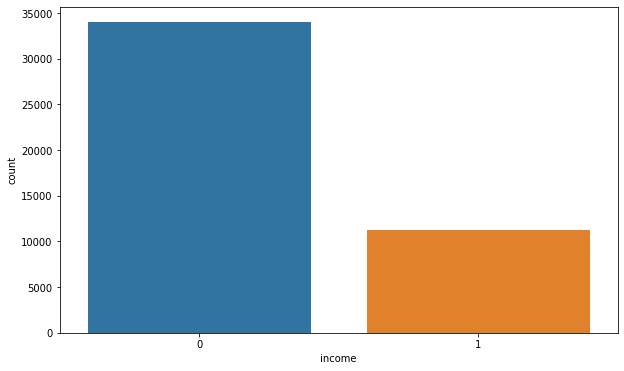

In [11]:
fig = plt.figure(figsize=(10,6))
sns.countplot('income', data=adult)
plt.show()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


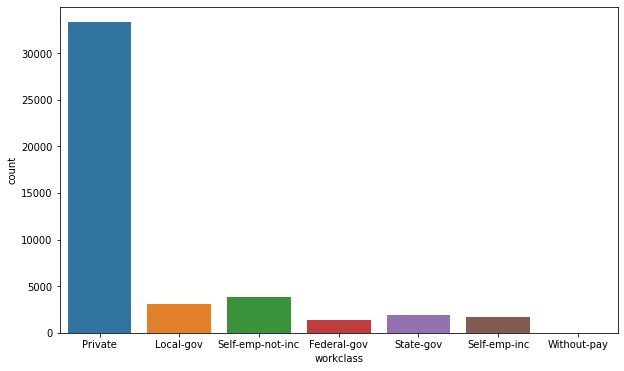

In [12]:
fig = plt.figure(figsize=(10,6))
sns.countplot('workclass', data=adult)
plt.show()

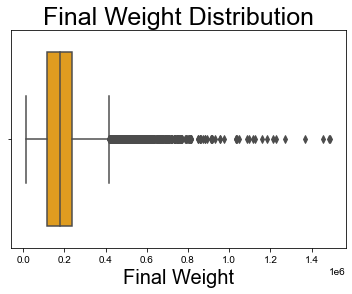

In [13]:
sns.boxplot(x=adult['fnlwgt'], color='orange')
sns.set({'figure.figsize':(10,7)})
plt.title('Final Weight Distribution', size=25)
plt.xlabel('Final Weight', size=20)
plt.show()

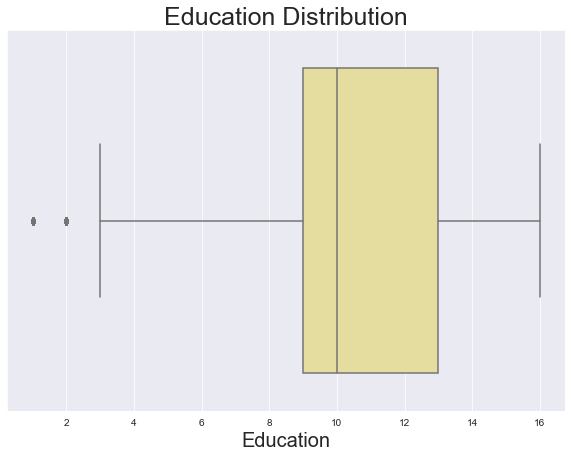

In [14]:
sns.boxplot(x=adult['educational-num'], color='#f0e594')
sns.set({'figure.figsize':(10,7)})
plt.title('Education Distribution', size=25)
plt.xlabel('Education', size=20)
plt.show()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


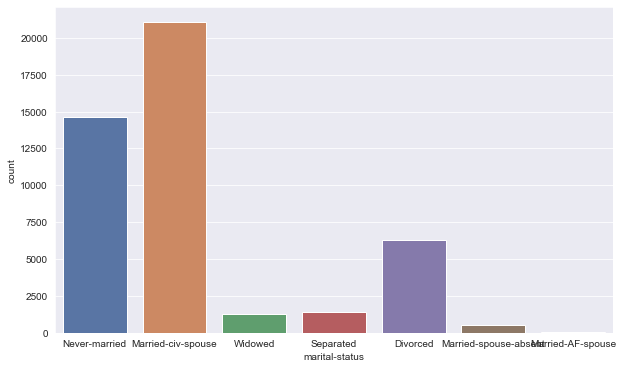

In [15]:
fig = plt.figure(figsize=(10,6))
sns.countplot('marital-status', data=adult)
plt.show()

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


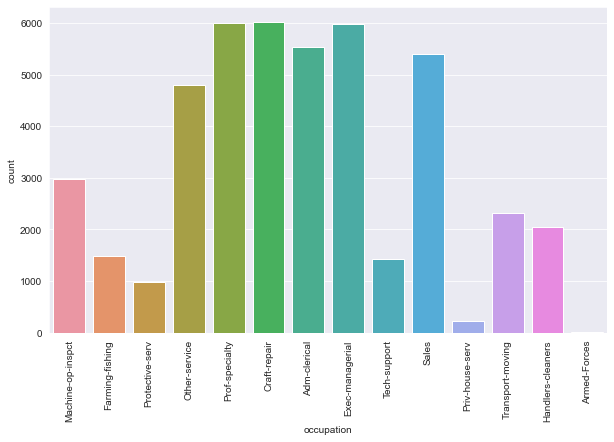

In [16]:
fig = plt.figure(figsize=(10,6))
sns.countplot('occupation', data=adult)
plt.xticks(rotation='vertical')
plt.show()

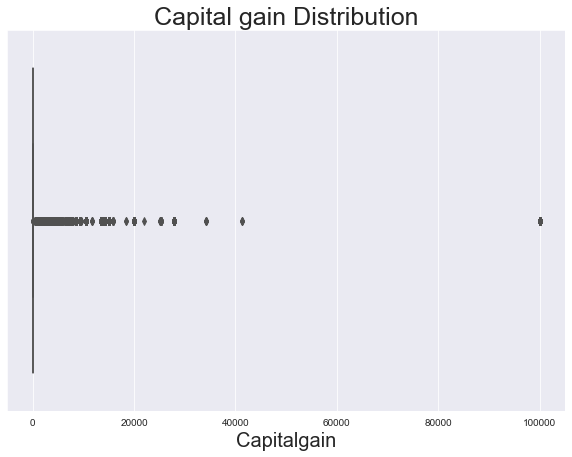

In [17]:
sns.boxplot(x=adult['capital-gain'], color='#57b884')
sns.set({'figure.figsize':(10,7)})
plt.title('Capital gain Distribution', size=25)
plt.xlabel('Capitalgain', size=20)
plt.show()

In [18]:
adult

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


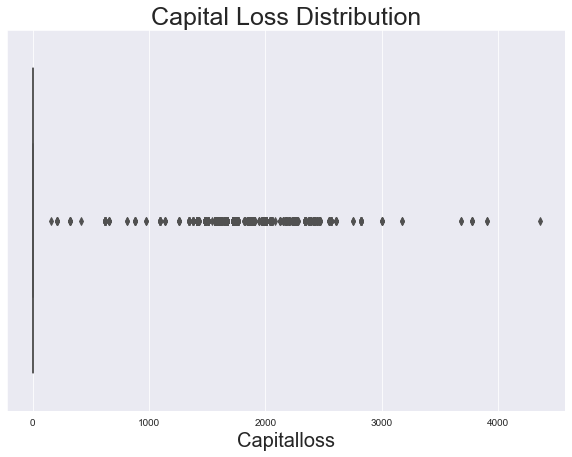

In [19]:
sns.boxplot(x=adult['capital-loss'], color='#57b884')
sns.set({'figure.figsize':(10,7)})
plt.title('Capital Loss Distribution', size=25)
plt.xlabel('Capitalloss', size=20)
plt.show()

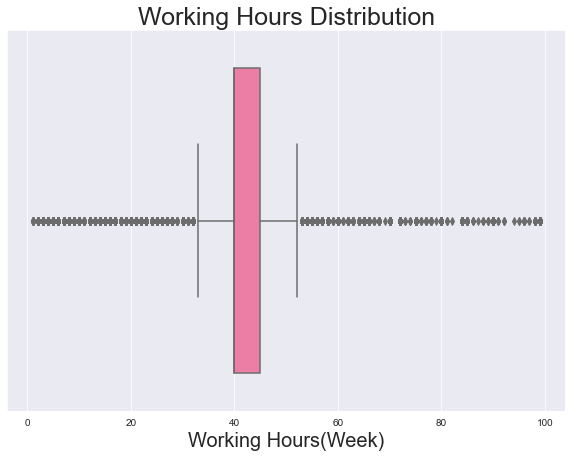

In [20]:
sns.boxplot(x=adult['hours-per-week'], color='#ff6a9e')
sns.set({'figure.figsize':(10,7)})
plt.title('Working Hours Distribution', size=25)
plt.xlabel('Working Hours(Week)', size=20)
plt.show()

In [21]:
adult.corr()['income']

age                0.237040
fnlwgt            -0.007264
educational-num    0.332800
capital-gain       0.221034
capital-loss       0.148687
hours-per-week     0.227199
income             1.000000
Name: income, dtype: float64

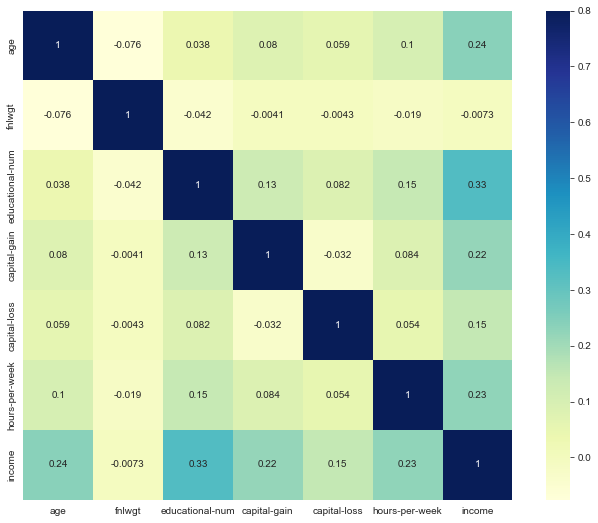

In [22]:
hmap = adult.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="YlGnBu", square=True);

In [23]:
X = adult.drop(['income'], axis=1)
y = adult['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
X_train.shape

(31655, 13)

In [24]:
X_train.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
19495,22,Private,190625,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,35,United-States
25992,48,Private,102938,13,Never-married,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,Vietnam
17103,29,Private,154411,11,Never-married,Tech-support,Own-child,White,Male,0,0,40,United-States
396,45,Private,355781,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,45,Japan
2752,37,Private,29660,12,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States


# Logistic Regression

In [25]:
lr_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

lr_model = LogisticRegression()

pipeline = make_pipeline(lr_transformer, scaler, lr_model)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

C:\Users\rutvi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
data1= confusion_matrix(y_test,y_pred)
cf_df= pd.DataFrame(data1,columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual yes'])
cf_df

,Predicted No,Predicted Yes
Actual No,9456,786
Actual yes,1320,2005


In [27]:
acc = accuracy_score(y_test, y_pred)
acc

0.8447703987617012

# Decision Tree

In [28]:
dt_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

dt_model = DecisionTreeClassifier()

pipeline = make_pipeline(dt_transformer, scaler, dt_model)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [29]:
data1= confusion_matrix(y_test,y_pred)
cf_df= pd.DataFrame(data1,columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual yes'])
cf_df

,Predicted No,Predicted Yes
Actual No,8910,1332
Actual yes,1200,2125


In [30]:
acc = accuracy_score(y_test, y_pred)
acc

0.8133706788530994

# Random Forest

In [31]:
rf_transformer = make_column_transformer((OneHotEncoder(drop='first'), ["workclass", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]),
                                    remainder='passthrough')

scaler = StandardScaler(with_mean=False)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10)

pipeline = make_pipeline(rf_transformer, scaler, rf_model)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [32]:
data1= confusion_matrix(y_test,y_pred)
cf_df= pd.DataFrame(data1,columns=['Predicted No','Predicted Yes'], index=['Actual No', 'Actual yes'])
cf_df

,Predicted No,Predicted Yes
Actual No,9763,479
Actual yes,1543,1782


In [33]:
acc = accuracy_score(y_test, y_pred)
acc

0.850961892828186